#### test notebook for skeleton plot

In [52]:
%load_ext autoreload
%autoreload 2
import skeleton_plot as skelplot
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
#various google cloud paths 

#raw skeleton files
skel_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'
skel_dir = '864691134884807418_518848'
skel_filename = '864691134884807418_518848.swc'

# upright
upright_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/upright/BIL_excitatory/'

# layer aligned
layer_aligned_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/layer_align/BIL_excitatory/'


# polygon files (layer bounds for each cell)
# gives 2d shape for each layer 
layer_bounds_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/poly_files/BIL_polys/'

# average layer bounds from IVSCC (to which layer aligned celled are alligned)
# this just gives a single value for each layer (straight line)
layer_bounds_average_path = "gs://allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/"
avg_layerdepths_filename = 'mouse_me_and_met_avg_layer_depths.json'


# mesh path with gs://
mw_path = 'gs://allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'


rid = 864691134884807418
sid = 518848


In [54]:
# successful run 
depths = skelplot.plot_tools.read_depths(layer_bounds_average_path, avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [55]:
# now https version 
depths = skelplot.plot_tools.read_depths('https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/',
                                         avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [56]:
# should raise error
depths = skelplot.plot_tools.read_depths('layer_bounds_average_path', 'avg_layerdepths_filename')
depths


UnsupportedProtocolError: [1;93m
Cloud Path must conform to [FORMAT://]PROTOCOL://PATH
Examples: 
  precomputed://gs://test_bucket/em
  gs://test_bucket/em
  graphene://https://example.com/image/em

Supported Formats: None (precomputed), graphene, precomputed, boss
Supported Protocols: gs, file, s3, matrix, http, https, mem

Cloud Path Recieved: layer_bounds_average_path
[m

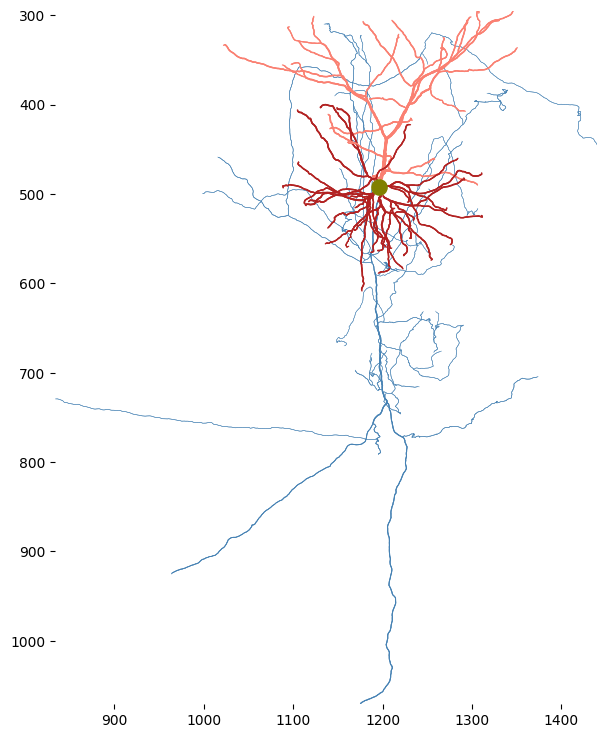

In [63]:
# plot the radii from the swc 
rid = 864691134884807418
sid = 518848
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')



f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_skel(ax, sk,  plot_radius = True, plot_compartment_colors = True,
                              invert_y=True, plot_soma = True, 
                             line_width = 3, color = 'darkslategray')

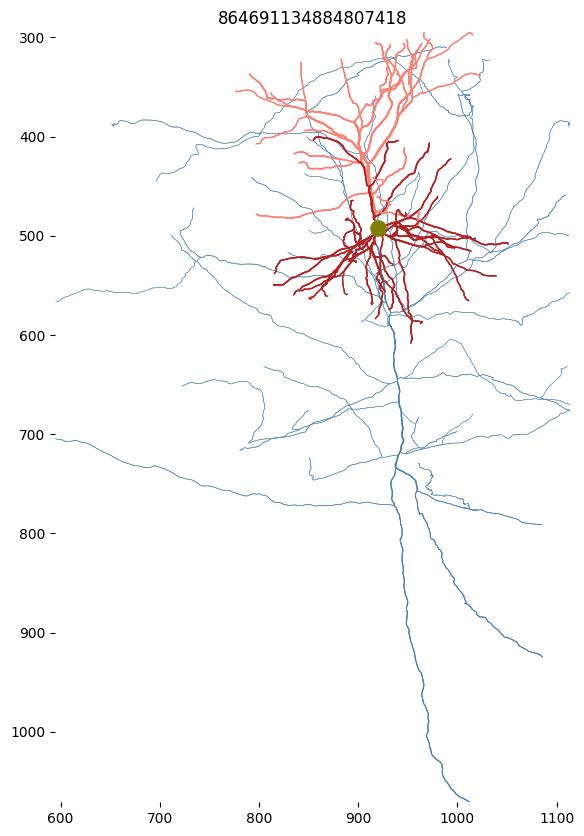

In [64]:
# invert y and x 
f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True, plot_compartment_colors = True,
                              invert_y=True, plot_soma = True, x = 'z', y = 'y',
                             line_width = 3)


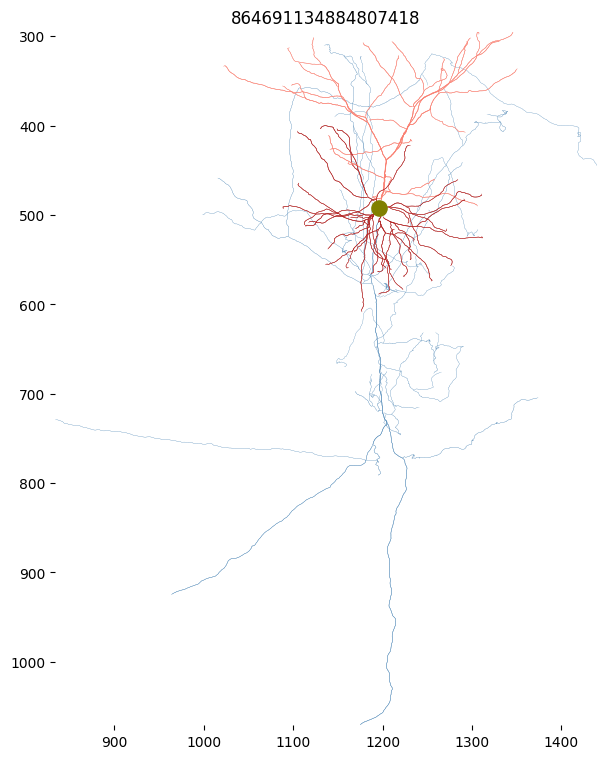

In [65]:
# plot with constant radius 
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_skel(ax, sk, title=rid, line_width=1, plot_soma=True, 
                                invert_y=True, plot_compartment_colors = True)



In [66]:
# check other swcs of mine, upright, layer aligned, etc 

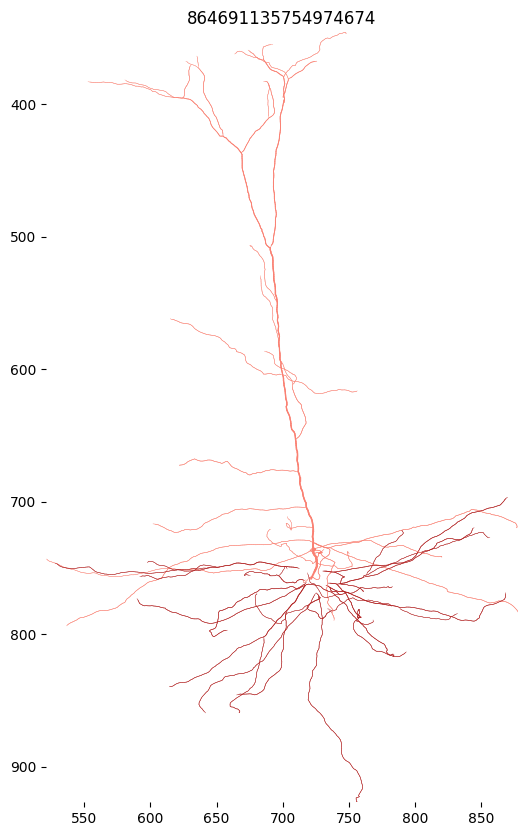

In [67]:
# plot some thicker skeletons with radius map 
rid = 864691135754974674
sid = 300897
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width=1, plot_compartment_colors = True)

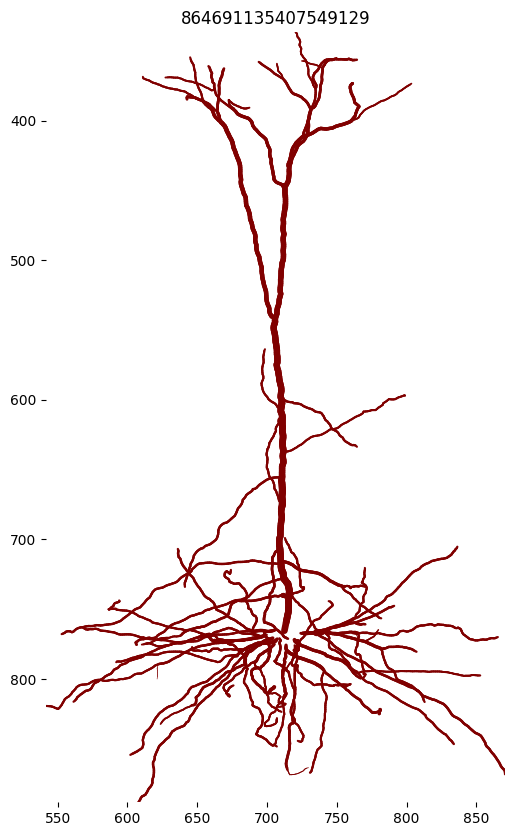

In [69]:
rid = 864691135407549129
sid = 265045
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width = 5, color = 'maroon')




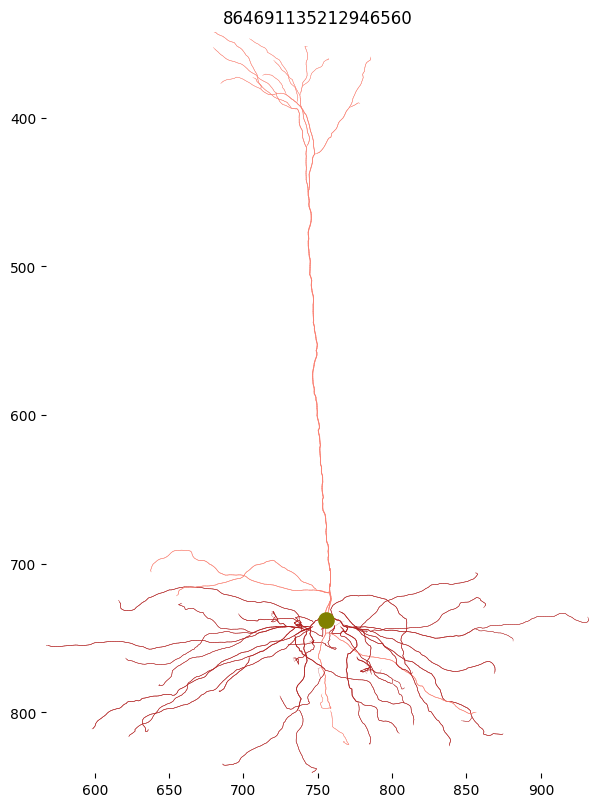

In [70]:
rid = 864691135212946560
sid = 301225
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width = 1, plot_soma = True,
                             plot_compartment_colors = True)

swc_path = f'{skel_path}{rid}_{sid}/{rid}_{sid}.swc'
df = skelplot.plot_tools.read_swc(swc_path)




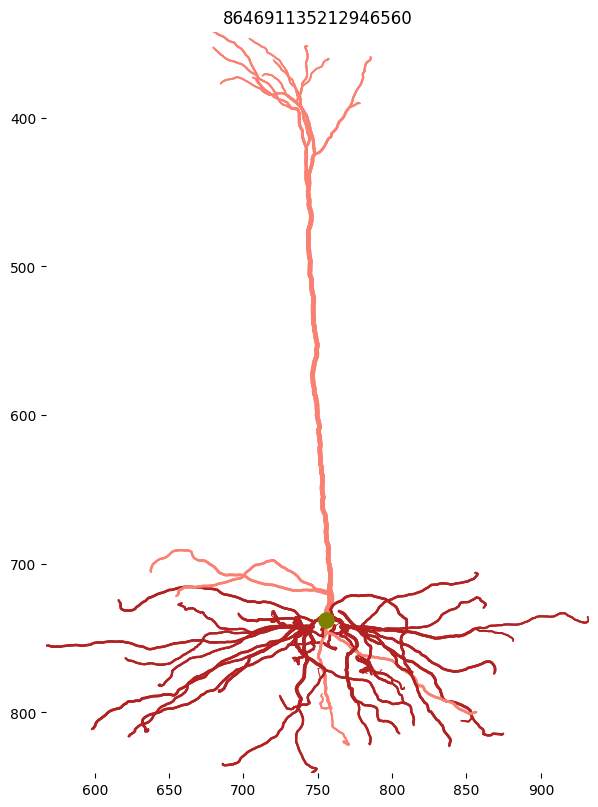

In [71]:
rid = 864691135212946560
sid = 301225
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_verts(ax, sk.vertices, sk.edges, radii = sk.vertex_properties['radius'],
                               compartments = sk.vertex_properties['compartment'], title=rid,  
                              invert_y=True, line_width = 5, plot_soma = True,
                             )

swc_path = f'{skel_path}{rid}_{sid}/{rid}_{sid}.swc'

df = skelplot.plot_tools.read_swc(swc_path)




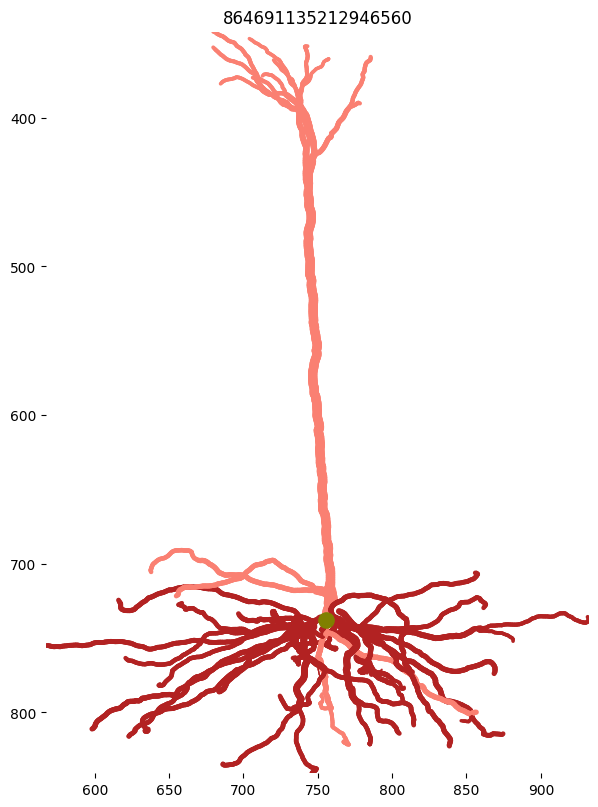

In [72]:
# test plot verts

rid = 864691135212946560
sid = 301225
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_verts(ax, sk.vertices, sk.edges, compartments = sk.vertex_properties['compartment'],
                               radii = sk.vertex_properties['radius'], title=rid, 
                              invert_y=True, line_width = 10, plot_soma = True)

swc_path = f'{skel_path}{rid}_{sid}/{rid}_{sid}.swc'
df = skelplot.plot_tools.read_swc(swc_path)


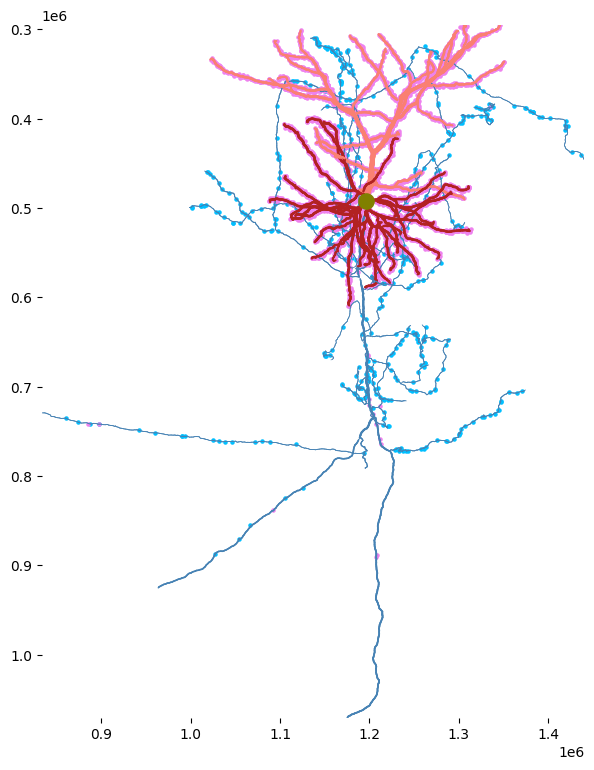

In [108]:
# test plot_mw_skel

rid = 864691134884807418
sid = 518848
filename = f"{rid}_{sid}/{rid}_{sid}.h5"

mw = skelplot.plot_tools.load_mw(filename, mw_path)
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_mw_skel(ax, mw, pull_radius = True,
                              invert_y=True, line_width = 5, plot_soma = True,
                             pull_compartment_colors = True, plot_presyn = True,
                                plot_postsyn = True)

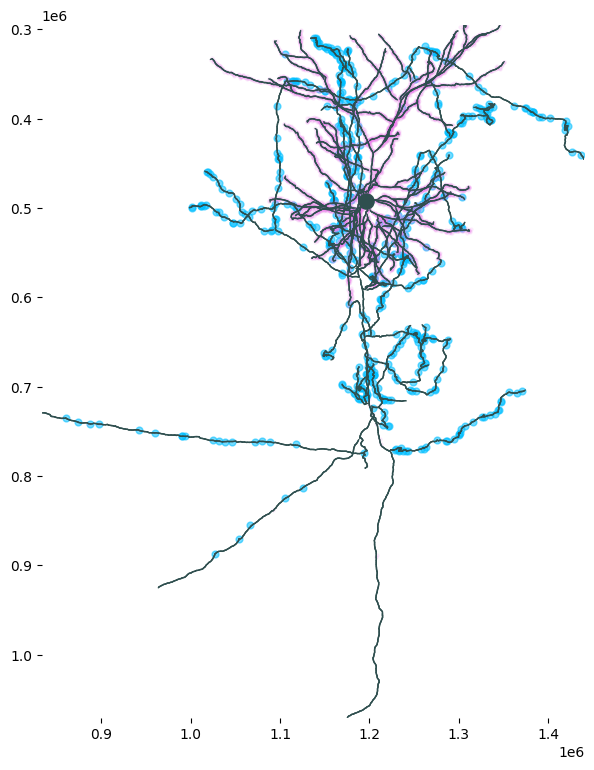

In [123]:
rid = 864691134884807418
sid = 518848
filename = f"{rid}_{sid}/{rid}_{sid}.h5"

mw = skelplot.plot_tools.load_mw(filename, mw_path)
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_mw_skel(ax, mw, pull_radius = False,
                              invert_y=True, line_width = 1, plot_soma = True,
                             pull_compartment_colors = False, plot_presyn = True,
                                plot_postsyn = True, presyn_alpha = .55, presyn_size = 24, 
                                postsyn_alpha = .1, )

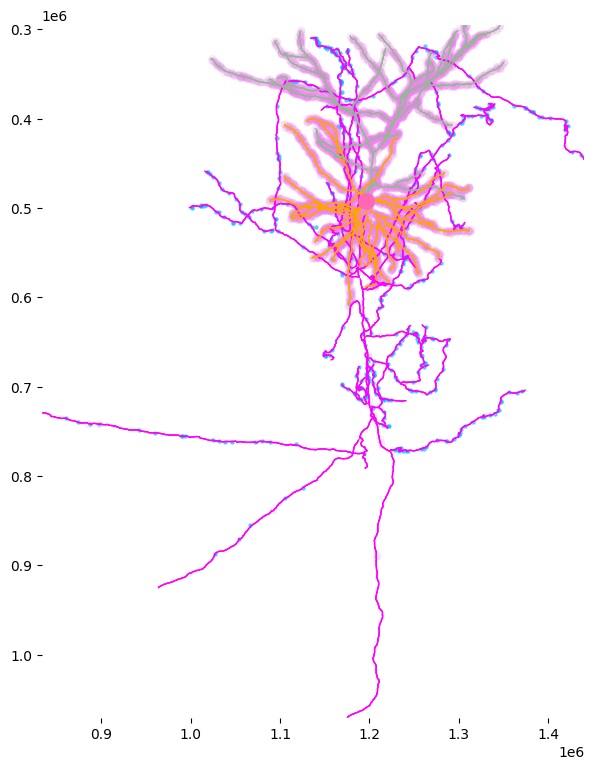

In [136]:
rid = 864691134884807418
sid = 518848
filename = f"{rid}_{sid}/{rid}_{sid}.h5"

compartment_colors = {3: "orange", 4: "darkseagreen", 2: "magenta", 1: "hotpink"}

mw = skelplot.plot_tools.load_mw(filename, mw_path)
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_mw_skel(ax, mw, pull_radius = False,
                              invert_y=True, line_width = 1, plot_soma = True,
                             pull_compartment_colors = True, plot_presyn = True,
                                plot_postsyn = True, presyn_alpha = .55, postsyn_size = 24, 
                                postsyn_alpha = .1, compartment_colors = compartment_colors)